## Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

## read dataset from csv file

In [2]:
df= pd.read_csv('dataset/dataset.csv')
df.head()

,id,task,Nationality,Sex,Disease,PD status,Age,Dominant hand,LED,UPDRS V,...,median_altitude_1st_derivative,median_altitude_2nd_derivative,median_azimuth_1st_derivative,median_azimuth_2nd_derivative,median_angle_in_stroke_10,median_angle_in_stroke_30,median_angle_in_stroke_50,median_angle_in_stroke_100,median_angle_in_stroke_300,median_angle_in_stroke_500
0,1,1,Czech,F,PD,ON,68,R,1115.0,2.0,...,0.0,0.0,0.0,0.0,180.000000,177.300709,176.657317,173.375469,160.623832,147.742578
1,1,2,Czech,F,PD,ON,68,R,1115.0,2.0,...,0.0,0.0,0.0,0.0,180.000000,171.202589,165.793234,145.245217,56.985293,38.082702
2,1,3,Czech,F,PD,ON,68,R,1115.0,2.0,...,0.0,0.0,0.0,0.0,173.659808,160.157418,142.878712,98.887094,103.953251,88.136389
3,1,4,Czech,F,PD,ON,68,R,1115.0,2.0,...,0.0,0.0,0.0,0.0,173.659808,158.334041,135.951957,87.263973,62.087051,53.385985
4,1,5,Czech,F,PD,ON,68,R,1115.0,2.0,...,0.0,0.0,0.0,0.0,171.869898,148.844373,117.445102,73.501597,80.597103,69.881913


## String data to categorical data

In [3]:
df['Sex'] = pd.Series(df['Sex']).astype('category').cat.codes
df['Nationality'] = pd.Series(df['Nationality']).astype('category').cat.codes
df['Disease'] = pd.Series(df['Disease']).astype('category').cat.codes
df['Dominant hand'] = pd.Series(df['Dominant hand']).astype('category').cat.codes

In [4]:
df.columns

Index(['id', 'task', 'Nationality', 'Sex', 'Disease', 'PD status', 'Age',
       'Dominant hand', 'LED', 'UPDRS V',
       ...
       'median_altitude_1st_derivative', 'median_altitude_2nd_derivative',
       'median_azimuth_1st_derivative', 'median_azimuth_2nd_derivative',
       'median_angle_in_stroke_10', 'median_angle_in_stroke_30',
       'median_angle_in_stroke_50', 'median_angle_in_stroke_100',
       'median_angle_in_stroke_300', 'median_angle_in_stroke_500'],
      dtype='object', length=127)

## Drop ot id, PD status UPDRS V columns

In [5]:
df.drop(['id', 'PD status', 'UPDRS V'],inplace=True, axis=1)

## Get y which is Disease column and X which is without disease column

In [6]:
y = df['Disease'].values.astype(np.int8)
X = df.drop(['Disease'], axis=1).values.astype(np.float32)

## Nan value replaced with 0

In [7]:
# find the columns with NaN
nan_cols = [i for i in range(X.shape[1]) if np.isnan(X[:, i]).any()]

# replace NaN with 0
X[:, nan_cols] = np.nan_to_num(X[:, nan_cols])


## Splitting , scaling and shuffling

In [9]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# shuffle data
X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [10]:
# find unique classes
classes = np.unique(y_test)
classes

array([0, 1], dtype=int8)

## Logistic Regression

In [11]:
# Fitting Logistic Regression to the Training set 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)


[[50  1]
 [ 0 69]]


## Accuracy Score, Confusion Matrix, Classification Report & ROC curve

Accuracy: 0.9916666666666667
Confusion matrix:
 [[50  1]
 [ 0 69]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.99      1.00      0.99        69

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



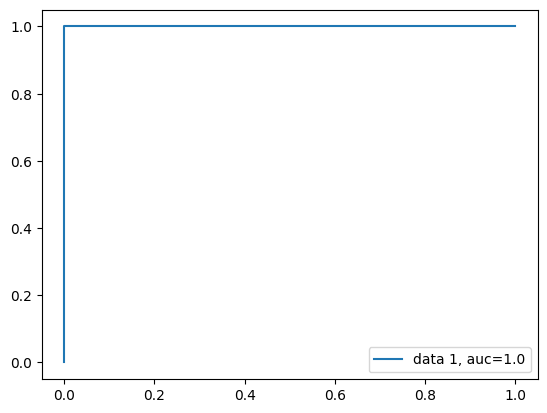

In [12]:
# accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# confusion matrix
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, y_pred))

# classification report
print("Classification report:\n",metrics.classification_report(y_test, y_pred))

# ROC curve
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [19]:
# total data accuracy score and confusion matrix
X_scaling = sc.transform(X)
y_pred = classifier.predict(X_scaling)
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Confusion matrix:\n",metrics.confusion_matrix(y, y_pred))

Accuracy: 0.998324958123953
Confusion matrix:
 [[301   1]
 [  0 295]]


## Save Logistic Regression model as pickle file

In [ ]:
# save model weights
import pickle
pickle.dump(classifier, open('models/logistic_regression.sav', 'wb'))
# load model weights
# classifier = pickle.load(open('models/logistic_regression.sav', 'rb'))

## Save Logistic Regression model coefficients, intercept and classes

In [26]:
# save model weights
coef = classifier.coef_
intercept = classifier.intercept_
classes = classifier.classes_
np.save('models/logistic_regression_coef.npy', coef)
np.save('models/logistic_regression_intercept.npy', intercept)
np.save('models/logistic_regression_classes_.npy', classes)


## Load Coefficients, intercept and classes

In [27]:
# load model weights
coef = np.load('models/logistic_regression_coef.npy')
intercept = np.load('models/logistic_regression_intercept.npy')
classes = np.load('models/logistic_regression_classes_.npy')
classifier_load = LogisticRegression(C=1e5, penalty='l2', solver='liblinear')
classifier_load.coef_ = coef
classifier_load.intercept_ = intercept
classifier_load.classes_ = classes

## Test the load model

In [28]:
y_pred = classifier_load.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9916666666666667


## Save scaler model

In [30]:
# save scaler model
import pickle
pickle.dump(sc, open('models/logistic_regression_scaler.sav', 'wb'))